
#Clustering
Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

Basic Algorithm for K-Means.
Step 1: Randomly pick K points to place K centroids
Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
Step 4: Reassign every point once again to the closest centroid.
Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.
Please refer to the video for an explanation of KMeans clustering.


#Hidden Markov Models
"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

This section is based on the following TensorFlow tutorial. https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

#Data
Let's start by discussing the type of data we use when we work with a hidden markov model.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

States: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

Observations: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

Transitions: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need.

States
Observation Distribution
Transition Distribution
For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.31.0 requires cloudpickle>=2.0.0, but you have cloudpickle 1.1.1 which is incompatible.
dask 2024.10.0 requires cloudpickle>=3.0.0, but you have cloudpickle 1.1.1 which is incompatible.
dopamine-rl 4.1.0 requires tensorflow-probability>=0.13.0, but you have tensorflow-probability 0.8.0rc0 which is incompatible.
gym 0.25.2 requires cloudpickle>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.


In [ ]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf

Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.

Cold days are encoded by a 0 and hot days are encoded by a 1.
The first day in our sequence has an 80% chance of being cold.
A cold day has a 30% chance of being followed by a hot day.
A hot day has a 20% chance of being followed by a cold day.
On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.
If you're unfamiliar with standard deviation it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.

In [ ]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

We've now created distribution variables to model our system and it's time to create the hidden markov model.

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [ ]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724699 10.71741  10.715222]


#Conclusion
So that's it for the core learning algorithms in TensorFlow. Hopefully you've learned about a few interesting tools that are easy to use! To practice I'd encourage you to try out some of these algorithms on different datasets.

#Sources
Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
“Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
“Build a Linear Model with Estimators  :   TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
Staff, EasyBib. “The Free Automatic Bibliography Composer.” EasyBib, Chegg, 1 Jan. 2020, www.easybib.com/project/style/mla8?id=1582473656_5e52a1b8c84d52.80301186.
Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 14 Sept. 2019, https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
Definition of Hidden Markov Model, http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html.
“Tfp.distributions.HiddenMarkovModel  :   TensorFlow Probability.” TensorFlow, www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel.

#Introduction to Neural Networks
In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called keras.

This guide is based on the following TensorFlow documentation.

https://www.tensorflow.org/tutorials/keras/classification

#Keras
Before we dive in and start discussing neural networks, I'd like to give a breif introduction to keras.

From the keras official documentation (https://keras.io/) keras is described as follows.

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU."
Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

In this guide we will use keras to quickly develop neural networks.

#What is a Neural Network?
So, what are these magical things that have been beating chess grandmasters, driving cars, detecting cancer cells and winning video games?

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction.

How it Works
Before going into too much detail I will provide a very surface level explination of how neural networks work on a mathematical level. All the terms and concepts I discuss will be defined and explained in more detail below.

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next (see below). These connections are defined by what we call a weight (some numeric value). Each layer also has something called a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

Y=(∑ni=0wixi)+b

w  stands for the weight of each connection to the neuron

x  stands for the value of the connected neuron from the previous value

b  stands for the bias at each layer, this is a constant

n  is the number of connections

Y  is the output of the current neuron

∑  stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, the activation function. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function  F(x)  is seen below.

Y=F((∑ni=0wixi)+b)

Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called backpropagation (explained below). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer.

#Data
The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are listed below.

Vector Data (2D)
Timeseries or Sequence (3D)
Image Data (4D)
Video Data (5D)
There are of course many different types or data, but these are the main categories.

#Layers
As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.

#Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.

#Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.

#Hidden Layer(s)
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.

#Neurons
Each layer is made up of what are called neurons. Neurons have a few different properties that we will discuss later. The important aspect to understand now is that each neuron is responsible for generating/holding/passing ONE numeric value.

This means that in the case of our input layer it will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

This also means that our output layer will have as many neurons as we have output information. The output is a little more complicated to understand so I'll refrain from an example right now but hopefully you're getting the idea.

But what about our hidden layers? Well these have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.

#Connected Layers
So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways.

Take for example Figure 1 (look above). Each neuron in one layer is connected to every neuron in the next layer. This is called a dense layer. There are many other ways of connecting layers but well discuss those as we see them.

#Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

#Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

#Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

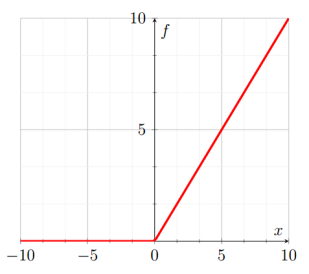

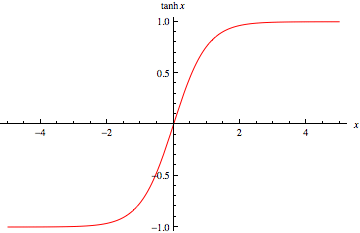

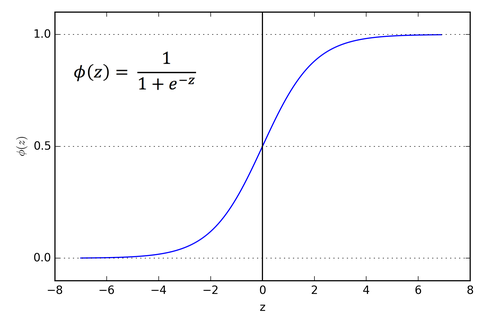

Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.

Mean Squared Error
Mean Absolute Error
Hinge Loss
Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

And that's all we really need to know for now. I'll direct you to the video for a more in depth explination.



NEURAL NETWORKS

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_images.shape
#60k images with 28*28 pixels

(60000, 28, 28)

In [5]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [6]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

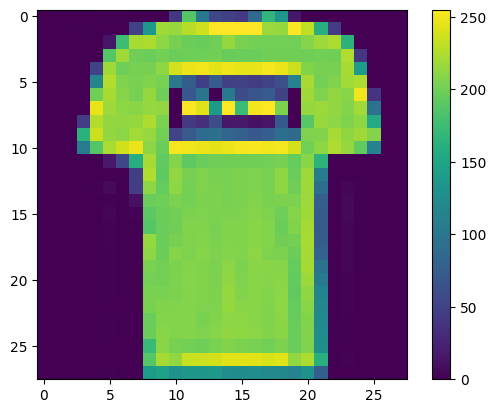

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#data preprocessing

massive input info and tiny weights and it would make inputs :
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [10]:
model = keras.Sequential([# sequential paases info from left to right in neural network sequentially
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

#compile the model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hyperparameter tuning is changing the values and seeing how these model perform with different values and outputs

#training or fitting the data

In [12]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7799 - loss: 0.6297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8614 - loss: 0.3841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8779 - loss: 0.3354
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8857 - loss: 0.3126
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8941 - loss: 0.2921
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8961 - loss: 0.2793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9014 - loss: 0.2655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9029 - loss: 0.2575
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9068 - loss: 0.2472
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9149 - loss: 0.2309


Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

#making predictions

In [15]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
predictions[0]

array([5.30545918e-08, 9.20063470e-10, 1.02017985e-07, 3.03723482e-08,
       2.99732470e-08, 6.16153283e-03, 8.51357584e-07, 6.91435765e-03,
       1.05809725e-07, 9.86922860e-01], dtype=float32)

we need higher accuracy overfit model can not act good for new data and will make false predictions

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

#verifying predictions

Pick a number: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


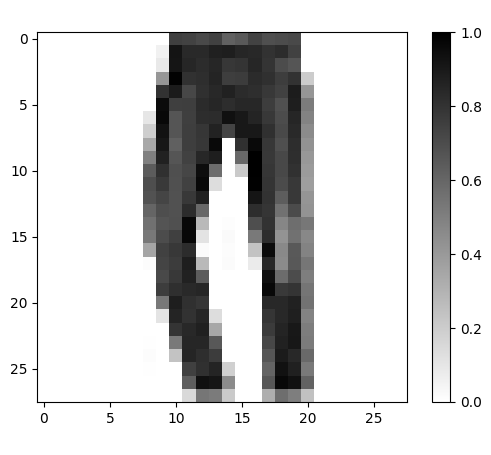

In [20]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

“Basic Classification: Classify Images of Clothing  :   TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

“Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

“Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.